# Personas Hospitalizadas en Hospitales de ZMVM por Covid


El dataset que se ocupó, fue extraído de la página oficial del **Portal de Datos Abiertos de la CDMX**. El cual lleva por nombre **Personas Hospitalizadas en Hospitales de ZMVM** y se puede visualizar con el siguiente link: https://datos.cdmx.gob.mx/dataset/personas-hospitalizadas-en-hospitales-de-zmvm

Esta base de datos contiene el total diario de personas hospitalizadas, confirmadas o sospechosas, por COVID-19 en los todos los hospitales y centros médicos de la Zona Metropolitana del Valle de México (ZMVM).

# OBJETIVO

Evaluar la evolución de hospitalizaciones y uso de ventilación en CDMX y Edomex entre 2020 y 2022 para entender el impacto de la pandemia en capacidad hospitalaria.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

ModuleNotFoundError: No module named 'pandas'

- Obtener y almacenar el Dataset

In [ ]:
link = r'https://datos.cdmx.gob.mx/dataset/b0d4230e-f37b-463e-8c16-3565aa78cbfc/resource/8b29f1ab-6245-42f1-878b-78e9a4b02374/download/personas_hospitalizadas_con_diagnostico_covid19_limpia.csv'
df = pd.read_csv(link)
display(df.head())
display(df.shape)

,fecha,anio,mes,hospitalizados_totales,hospitalizados_totales_cdmx,hospitalizados_totales_edomex,camas_intubados_totales,camas_intubados_cdmx,camas_intubados_edomex
0,2020-03-24,2020,marzo,50,50,0,39,39,0
1,2020-03-25,2020,marzo,105,105,0,33,33,0
2,2020-03-26,2020,marzo,128,128,0,42,42,0
3,2020-03-27,2020,marzo,175,175,0,60,60,0
4,2020-03-28,2020,marzo,257,257,0,78,78,0


(670, 9)

- Limpieza de Datos

In [ ]:
display(df.info())
display(df.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 670 entries, 0 to 669
Data columns (total 9 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   fecha                          670 non-null    object
 1   anio                           670 non-null    int64 
 2   mes                            670 non-null    object
 3   hospitalizados_totales         670 non-null    int64 
 4   hospitalizados_totales_cdmx    670 non-null    int64 
 5   hospitalizados_totales_edomex  670 non-null    int64 
 6   camas_intubados_totales        670 non-null    int64 
 7   camas_intubados_cdmx           670 non-null    int64 
 8   camas_intubados_edomex         670 non-null    int64 
dtypes: int64(7), object(2)
memory usage: 47.2+ KB


None

fecha                            0
anio                             0
mes                              0
hospitalizados_totales           0
hospitalizados_totales_cdmx      0
hospitalizados_totales_edomex    0
camas_intubados_totales          0
camas_intubados_cdmx             0
camas_intubados_edomex           0
dtype: int64

- Crear una columna que contenga *anio* y *mes*

In [ ]:
# Primero vamos a mapear los meses, para que a la hora de aplicar .sort_values(), se acomoden de forma ascendente
mapeo = {'enero':'01', 'febrero':'02', 'marzo':'03', 'abril':'04', 'mayo':'05', 'junio':'06',
         'julio':'07', 'agosto':'08', 'septiembre':'09', 'octubre':'10', 'noviembre':'11', 'diciembre':'12'}

df['Año/Mes'] = df['anio'].astype(str) + '-' + df['mes'].map(mapeo)
df.drop(columns=['fecha', 'anio', 'mes'], inplace=True)
df

,hospitalizados_totales,hospitalizados_totales_cdmx,hospitalizados_totales_edomex,camas_intubados_totales,camas_intubados_cdmx,camas_intubados_edomex,Año/Mes
0,50,50,0,39,39,0,2020-03
1,105,105,0,33,33,0,2020-03
2,128,128,0,42,42,0,2020-03
3,175,175,0,60,60,0,2020-03
4,257,257,0,78,78,0,2020-03
...,...,...,...,...,...,...,...
665,2526,1720,806,581,453,128,2022-02
666,2338,1602,736,564,437,127,2022-02
667,2309,1593,716,574,447,127,2022-02
668,2277,1557,720,569,441,128,2022-02


## Agrupar por año y mes

### Hospitalizados

- Suma por Mes

In [ ]:
df_sum = df.groupby('Año/Mes').sum().reset_index()
df_hosp_sum = pd.melt( df_sum,
    id_vars='Año/Mes',
	value_vars=['hospitalizados_totales_cdmx', 'hospitalizados_totales_edomex'],
	var_name='Entidad',
	value_name='Hospitalizados'
)

- Promedio por Mes

In [ ]:
df_mean = df.groupby('Año/Mes').mean().reset_index()
df_hosp_mean = pd.melt( df_mean,
    id_vars='Año/Mes',
	value_vars=['hospitalizados_totales_cdmx', 'hospitalizados_totales_edomex'],
	var_name='Entidad',
	value_name='Hospitalizados'
)

- Min y Max por Mes

In [ ]:
df_min_max = df.groupby('Año/Mes').agg(['min', 'max']).reset_index()
df_min_max.columns = ['Año/Mes',
					  'hospitalizados_totales_min', 'hospitalizados_totales_max',
					  'hospitalizados_totales_cdmx_min', 'hospitalizados_totales_cdmx_max',
					  'hospitalizados_totales_edomex_min', 'hospitalizados_totales_edomex_max',
					  'camas_intubados_totales_min', 'camas_intubados_totales_max',
					  'camas_intubados_cdmx_min', 'camas_intubados_cdmx_max',
					  'camas_intubados_edomex_min', 'camas_intubados_edomex_max']
df_hosp_min_max = pd.melt( df_min_max,
	id_vars='Año/Mes',
	value_vars=['hospitalizados_totales_cdmx_min', 'hospitalizados_totales_edomex_min', 'hospitalizados_totales_cdmx_max', 'hospitalizados_totales_edomex_max'],
	var_name='Entidad',
	value_name='Hospitalizados'
)

### En cama con oxígeno

- Suma


In [ ]:
df_oxig_sum = pd.melt(df_sum,
                      id_vars= 'Año/Mes',
                      value_vars= ['camas_intubados_cdmx', 'camas_intubados_edomex'],
                      var_name= 'Entidad',
                      value_name= 'En Cama con Oxígeno')

- Promedio

In [ ]:
df_oxig_mean = pd.melt(df_mean,
                      id_vars= 'Año/Mes',
                      value_vars= ['camas_intubados_cdmx', 'camas_intubados_edomex'],
                      var_name= 'Entidad',
                      value_name= 'En Cama con Oxígeno')

- Mínimo/Máximo

In [ ]:
df_oxig_min_max = pd.melt(df_min_max,
                      id_vars= 'Año/Mes',
                      value_vars= ['camas_intubados_cdmx_min', 'camas_intubados_edomex_min', 'camas_intubados_cdmx_max', 'camas_intubados_edomex_max'],
                      var_name= 'Entidad',
                      value_name= 'En Cama con Oxígeno')

## Visualización Gráfica

### Hospitalizados y en Cama con Oxígeno

C:\Users\moral\AppData\Local\Temp\ipykernel_22156\1905264599.py:5: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[0,0].set_xticklabels(axes[0,0].get_xticklabels(), rotation=90)
C:\Users\moral\AppData\Local\Temp\ipykernel_22156\1905264599.py:8: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[0,1].set_xticklabels(axes[0,1].get_xticklabels(), rotation=90)
C:\Users\moral\AppData\Local\Temp\ipykernel_22156\1905264599.py:11: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[0,2].set_xticklabels(axes[0,2].get_xticklabels(), rotation=90)
C:\Users\moral\AppData\Local\Temp\ipykernel_22156\1905264599.py:15: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[1

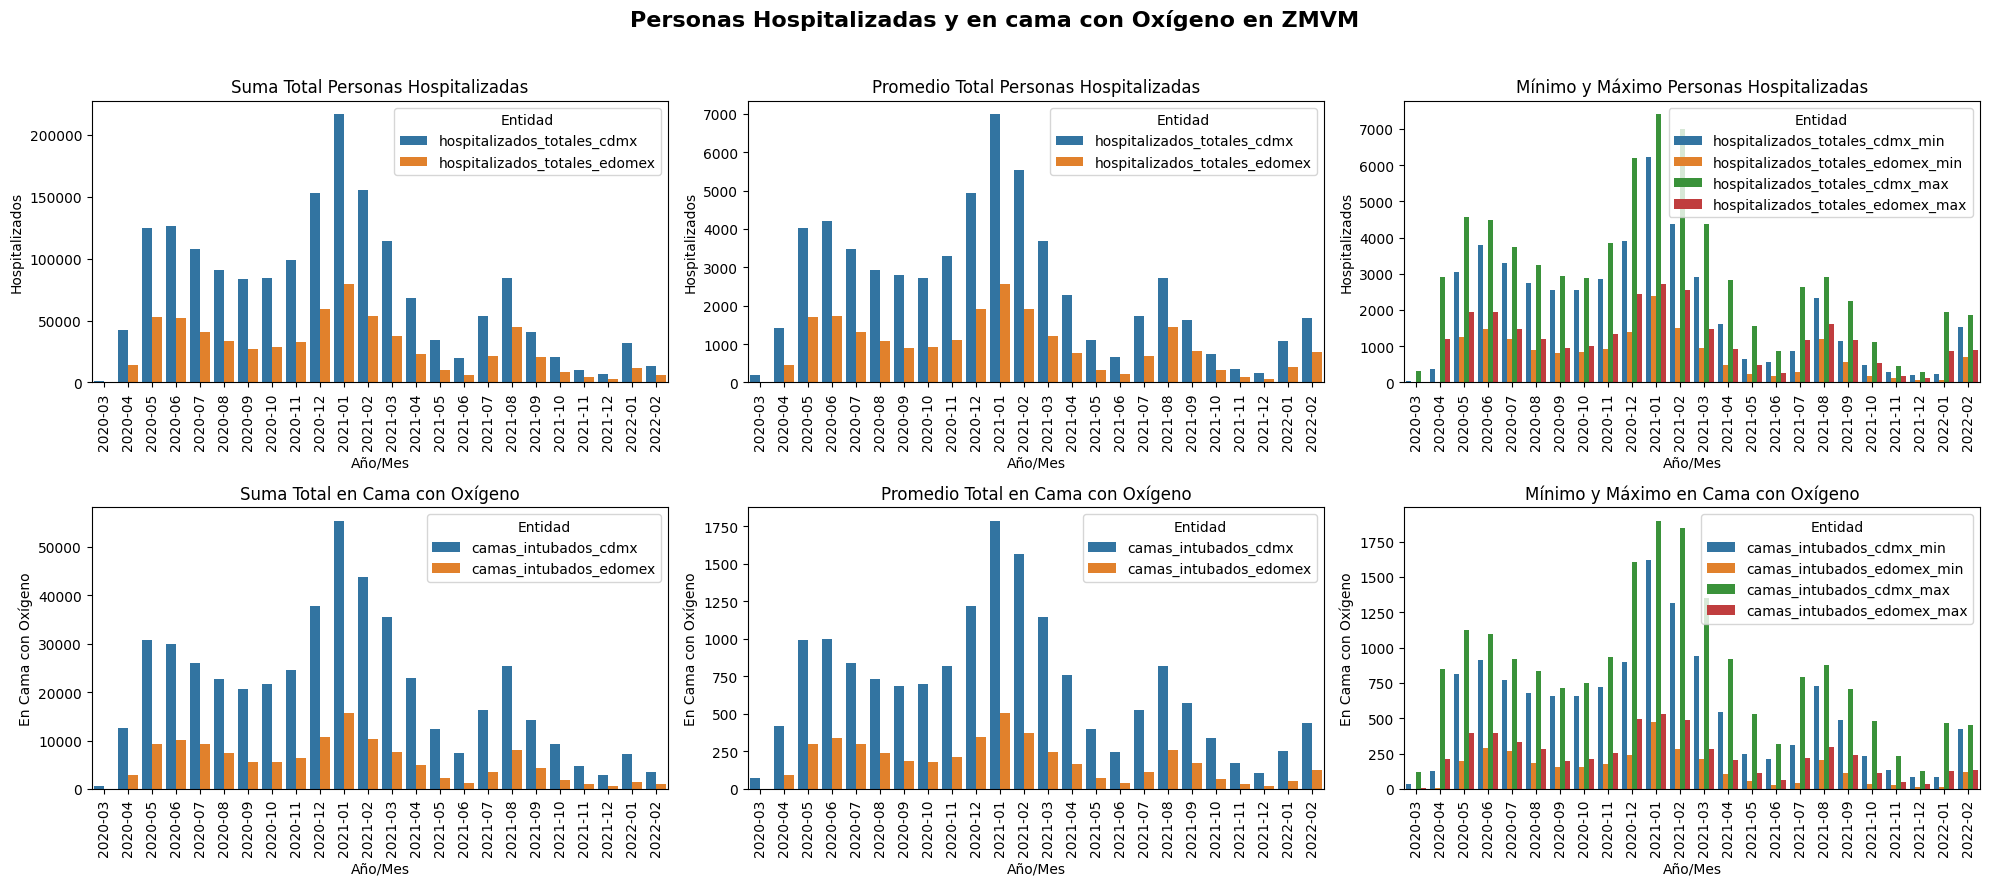

In [ ]:
fig, axes = plt.subplots(2, 3, figsize=(20, 9))
fig.suptitle('Personas Hospitalizadas y en cama con Oxígeno en ZMVM', fontsize=16, weight='bold')
axes[0,0].set_title('Suma Total Personas Hospitalizadas')
sns.barplot(data=df_hosp_sum, x='Año/Mes', y='Hospitalizados', hue='Entidad', ax=axes[0,0])
axes[0,0].set_xticklabels(axes[0,0].get_xticklabels(), rotation=90)
axes[0,1].set_title('Promedio Total Personas Hospitalizadas')
sns.barplot(data=df_hosp_mean, x='Año/Mes', y='Hospitalizados', hue='Entidad', ax=axes[0,1])
axes[0,1].set_xticklabels(axes[0,1].get_xticklabels(), rotation=90)
axes[0,2].set_title('Mínimo y Máximo Personas Hospitalizadas')
sns.barplot(data=df_hosp_min_max, x='Año/Mes', y='Hospitalizados', hue='Entidad', ax=axes[0,2])
axes[0,2].set_xticklabels(axes[0,2].get_xticklabels(), rotation=90)

axes[1,0].set_title('Suma Total en Cama con Oxígeno')
sns.barplot(data=df_oxig_sum, x='Año/Mes', y='En Cama con Oxígeno', hue='Entidad', ax=axes[1,0])
axes[1,0].set_xticklabels(axes[1,0].get_xticklabels(), rotation=90)
axes[1,1].set_title('Promedio Total en Cama con Oxígeno')
sns.barplot(data=df_oxig_mean, x='Año/Mes', y='En Cama con Oxígeno', hue='Entidad', ax=axes[1,1])
axes[1,1].set_xticklabels(axes[1,1].get_xticklabels(), rotation=90)
axes[1,2].set_title('Mínimo y Máximo en Cama con Oxígeno')
sns.barplot(data=df_oxig_min_max, x='Año/Mes', y='En Cama con Oxígeno', hue='Entidad', ax=axes[1,2])
axes[1,2].set_xticklabels(axes[1,2].get_xticklabels(), rotation=90)
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

# Conclusiones

Podemos observar que los meses en los que hubo un incremento de contagios por COVID-19 en la **Zona Metropolitana del Valle de México** entre 2020 - 2022, fuerón:
- *Abril, Mayo, Junio de 2020*
- *Noviembre, Diciembre de 2020 y Enero 2021*
- *Julio y Agosto 2021*
- *Enero 2022*

Si analizamos las fechas podemos notar que los picos más altos de contagio, fuerón en épocas fiesta (Día de Muertos, Navidad, año nuevo, etc.). Fechas del año, donde se acostumbra mucho a ir de fiestas, convivir con personas, etc; actos que no se debían hacer ya que estabamos en **Pandemia**. En resumen, se puede resaltar uqe los motivos por el cual el incremento de personas que empezaron a ser hospitalizadas y que obiamente algunas empezaron a usar oxígeno, fue porque convivieron con muchas personas, no se cuidaban los suficiente o no tomaron enserio la situación que se estaba viviendo (que fue algo que sucedio en los primeros meses de pandemia, cuyos resultados se ven en las gráficas).

**Recomendación**: tomar medidas extremas por parte de los ciudadanos, del propio gobierno y establecimientos que que venda productos o servicios para fiestas, evitarlos en estas fechas/epocas del año, ya que en caso de vivir otra pandemia, las fechas que pueden desencadenar que el contagio incremente es en fechas festivas, específicamente: *Día de Muertos*, *Halloween* (para las personas que hacen fiestas de disfraces), *Navidad* y *Año Nuevo*.

También podemos observar que aproximadamente un 30% de las personas que fueron Hospitalizadas, necesitarón del oxígeno, es decir; un 70% no tuvo la necesidad del oxígeno (aunque claro, este Dataset no da información del número de personas que se recuperaron y las que no).

Y última observación, se puede analizar que **CDMX** fue la entidad la cual contó con mayor saturación de personas hospitalizadas que **EDOMEX**, ya que **EDOMEX** siempre estuvo por debajo aproximadamente del 50%. Lo que nos puede decir que probablemente si vivieramos en **EDOMEX** las probabilidades de contagiarnos hubiera sido un poco menor que en **CDMX**, aunque esto no es tan claro ya que no se sabe si las personas que se hospitalizaron en dichas entidades eran 100% residentes de ahí o venían de otras entidades, y tambien contemplar el número de población que cuenta cada entidad, ya que el progreso en como se hiban dando los contagios por fecha son exactamente iguales, es decir; ambas entidades sufrieon los mismos incrementos y decrementos en cada mes, no hay entidad en donde haya sido diferente.

En resumen, se puede determinar que no importaba la entidad que estuvieras, ya que los incrementos y decrementos de contagios por COVID-19 se dieron de la misma manera, aunque claro; una entidad tuvo más que otra, pero aún así los contagios por mes tenían el mismo resultado de incremeentos y decrementos.